## Notebook 1 : Query 2
#### Auteur : N. LETEURTRE & N. Paulmier
#### Date : Mars 2025
#### Formation : BUT Info, SAE204
------

#### Objectif

Nombre de réservation en fonction du type de chambre d'un hôtel donné, trié par mois de l'année 2019.



#### Import des composants pour la connexion à la base de données

In [1]:
import cx_Oracle
import db_config

#### Création de la connexion à la BD SAE204

In [2]:
vconnect = cx_Oracle.connect(db_config.user,db_config.pwd,db_config.dsn)

#### Requête

##### Types de chambres les plus rentables 

In [3]:
query = """
        SELECT T.TYPE_CHAMBRE, COUNT(RC.ID_CHAMBRE_RESA) AS "Nbre de résa"
        FROM CLIENT C
        JOIN RESERVATION R ON C.ID_CLIENT = R.CLIENT
        JOIN RESERVATION_CHAMBRE RC ON R.ID_RESA = RC.RESERVATION
        JOIN CHAMBRE CH ON RC.CHAMBRE =  CH.ID_CHAMBRE
        JOIN TYPE_CHAMBRE T ON CH.TYPE = T.ID_TYPE_CHAMBRE
        WHERE CH.HOTEL = :v_id_hotel AND
              Extract(MONTH FROM TO_DATE(RC.ARRIVEE, 'dd/mm/yyyy')) = :v_mois
        GROUP BY T.TYPE_CHAMBRE
        ORDER BY T.TYPE_CHAMBRE
        """

#### Import de la librairie ```matplotlib``` et l'interface pyplot
##### Pour plus d'informations :https//matplotlib.org/

In [4]:
!pip install matplotlib
import matplotlib.pyplot as plot
import random

     |████████████████████████████████| 8.3 MB 2.6 MB/s            
     |████████████████████████████████| 4.5 MB 83.2 MB/s            
     |████████████████████████████████| 1.6 MB 93.0 MB/s            
     |████████████████████████████████| 4.6 MB 82.2 MB/s            
     |████████████████████████████████| 19.5 MB 78.7 MB/s            
     |████████████████████████████████| 321 kB 102.3 MB/s            


/opt/conda/lib/python3.9/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [10]:
x_label = "Type de Chambre"
y_label = "Nombre de réservations"
x_data = []
y_data = []

def execute_query(id_hotel, mois):
    vcursor = cx_Oracle.Cursor(vconnect)
    vcursor.execute(query, v_id_hotel = id_hotel, v_mois = mois)
    x_data.clear()
    y_data.clear()
    for row in vcursor.fetchall():
        x_data.append(row[0])
        y_data.append(row[1])
    
    
def init_plot():
    plot.figure()
    #plot.subplot(111)
    plot.rcParams["figure.figsize"] = [20,5]
    plot.grid(True)
    
    plot.xlabel(x_label)
    plot.ylabel(y_label)
    plot.suptitle("Nombre de réservation par type de chambre, par mois, de l'hôtel %s durant l'année 2019"%(id_hotel))
    
    
def add_data_plot(mois, type_chart = 'bar'):    
    plot.grid(True)
    plot_label = 'Mois %s' %(mois)
    color = (random.random(), random.random(),random.random())
    if (type_chart == 'plot'):
        plot.plot(x_data, y_data, color = color , label = plot_label)
    elif (type_chart == 'bar'):
        plot.bar(x_data, y_data, color = color , label = plot_label)

def show_plot():
    plot.legend(loc='upper right')
    plot.show()

#### Exécution de la requête

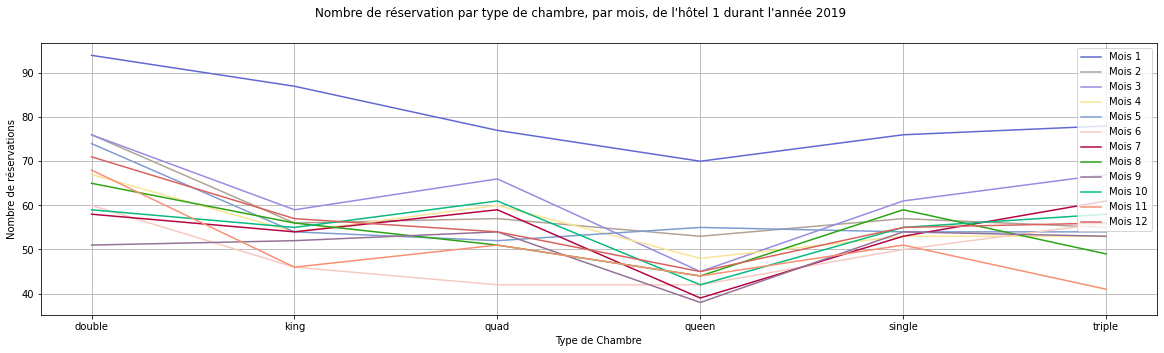

In [11]:
id_hotel = 1
init_plot()
for mois in range(1,13):
    execute_query(id_hotel, mois)
    add_data_plot(mois,'plot')
show_plot()

#### Exécution de la requête

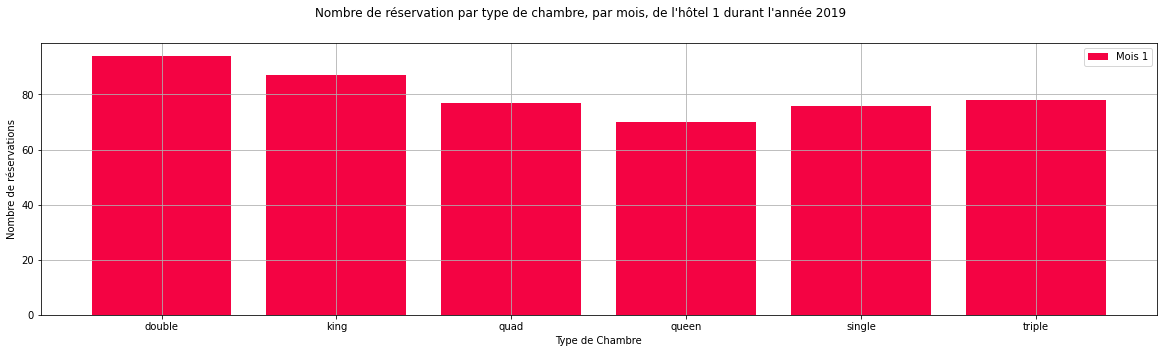

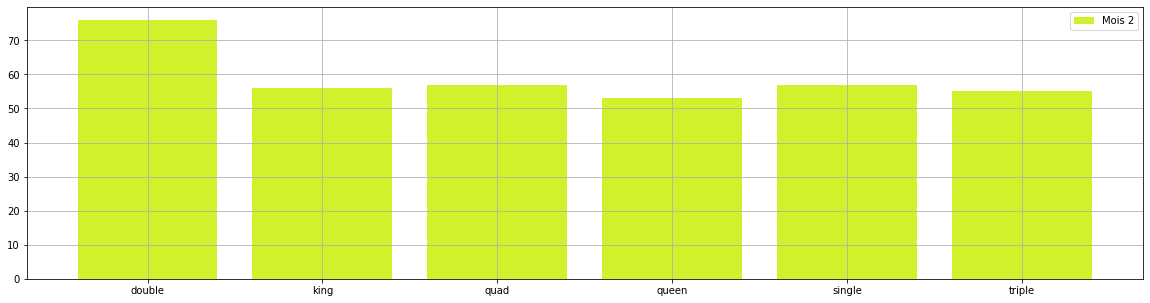

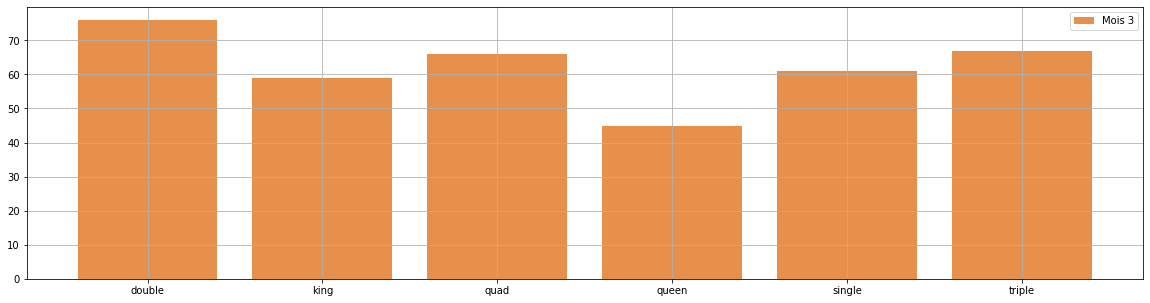

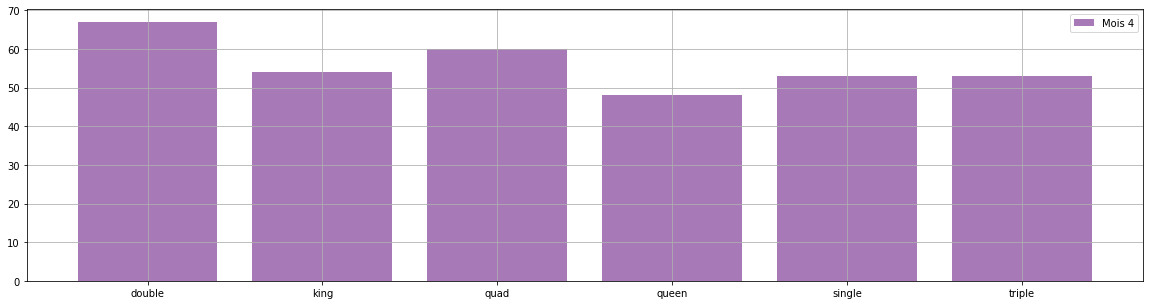

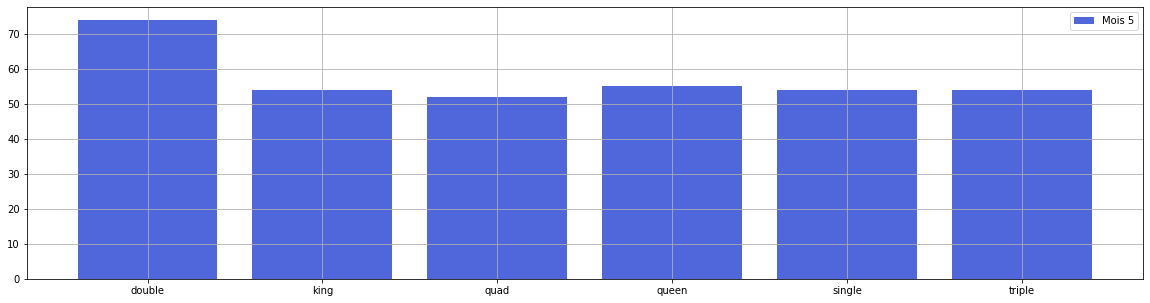

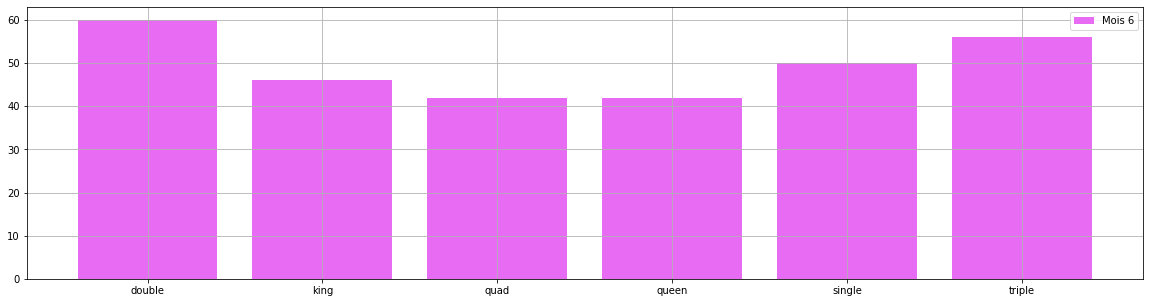

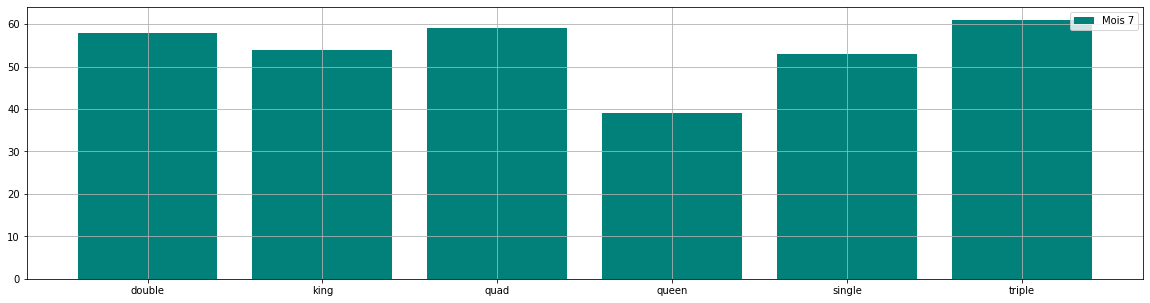

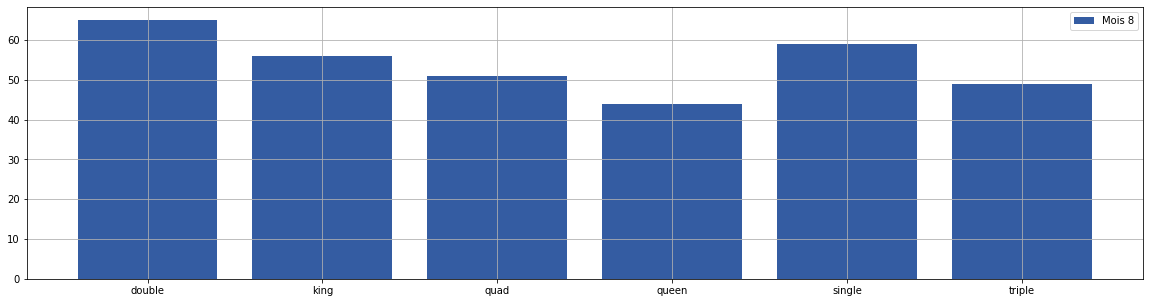

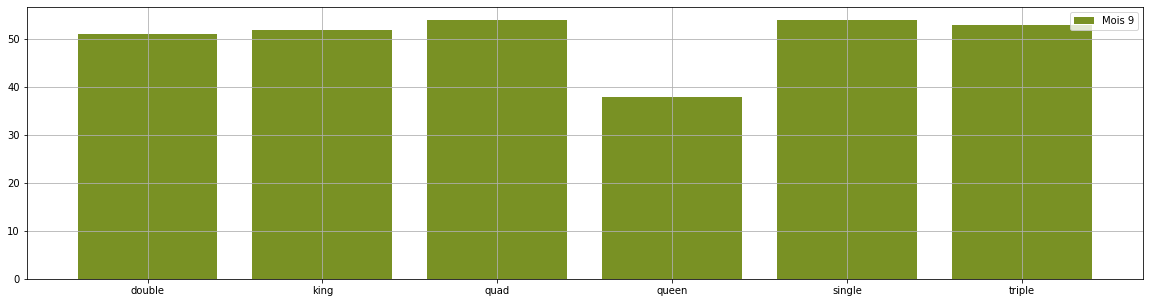

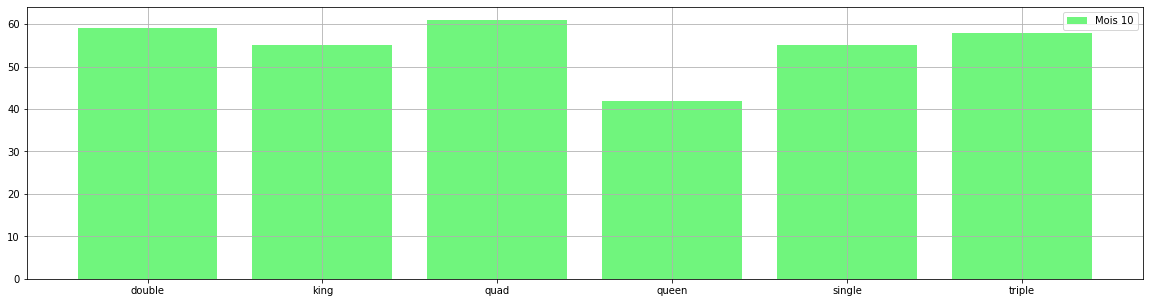

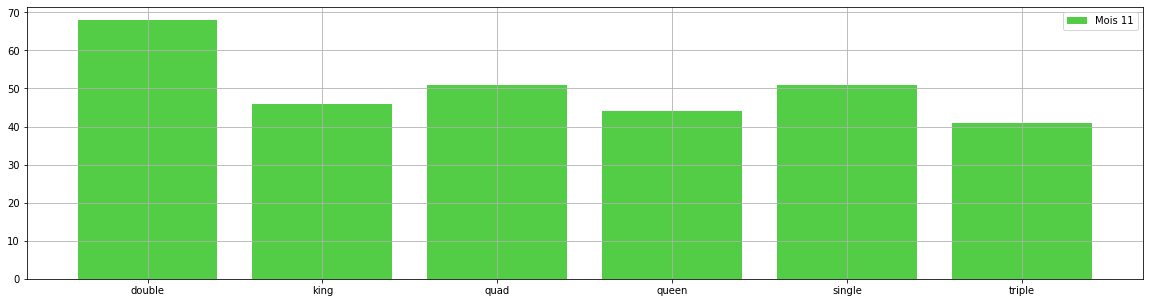

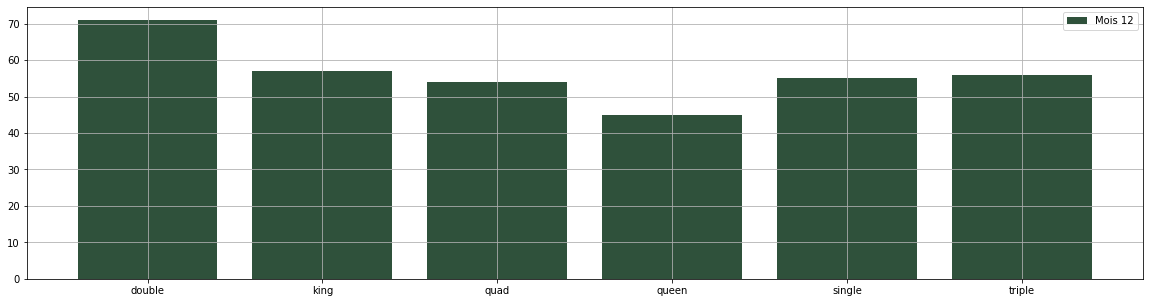

In [12]:
id_hotel = 1
init_plot()
for mois in range(1,13):
    execute_query(id_hotel, mois)
    add_data_plot(mois)
    show_plot()

#### Exécution de la requête

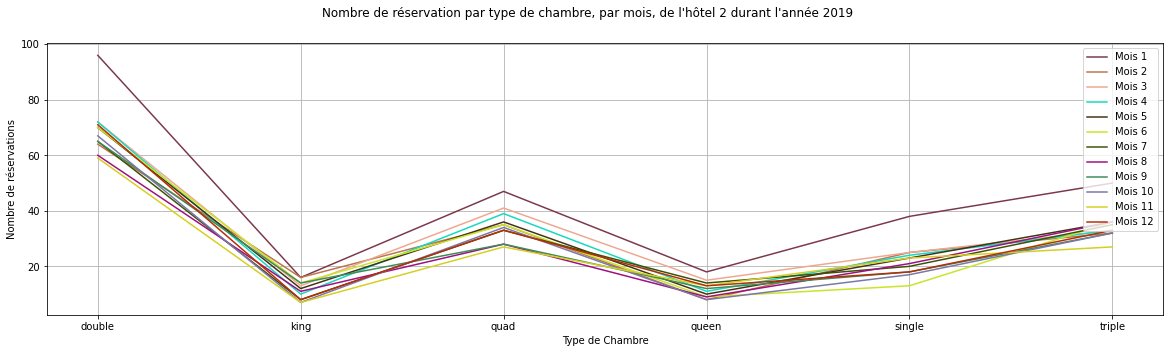

In [13]:
id_hotel = 2
init_plot()
for mois in range(1,13):
    execute_query(id_hotel, mois)
    add_data_plot(mois,'plot')
show_plot()

#### Exécution de la requête

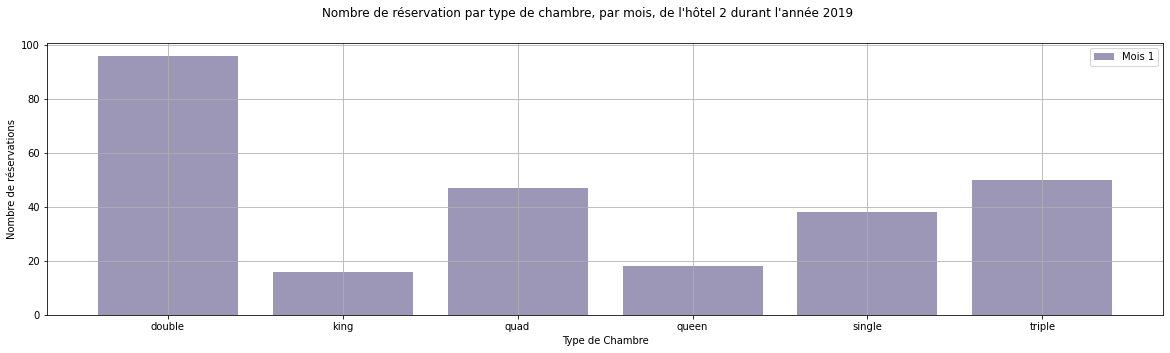

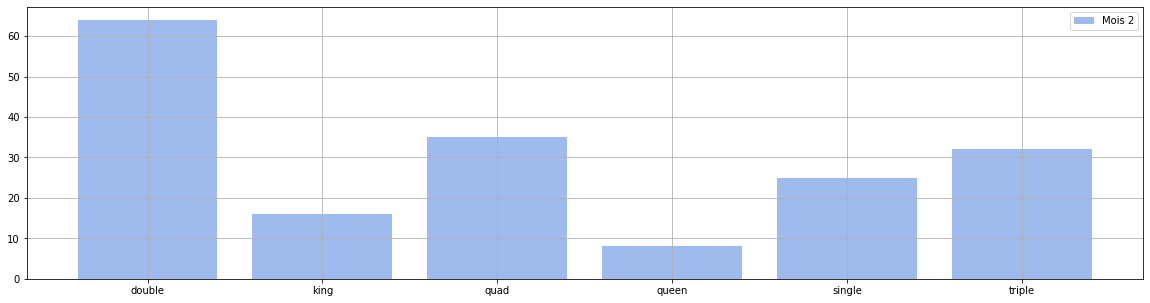

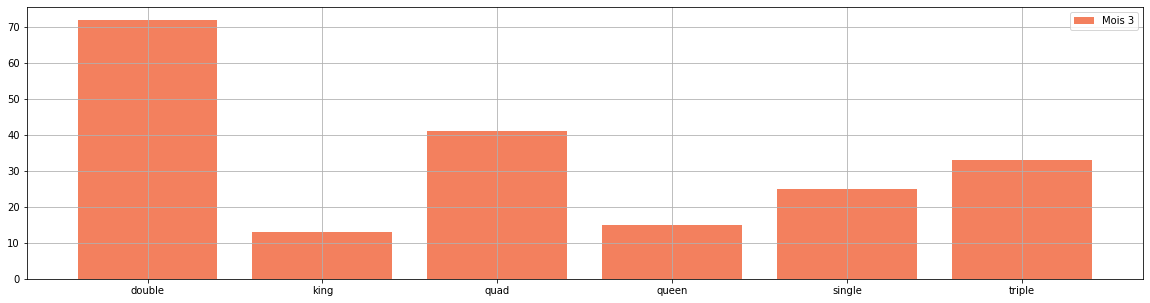

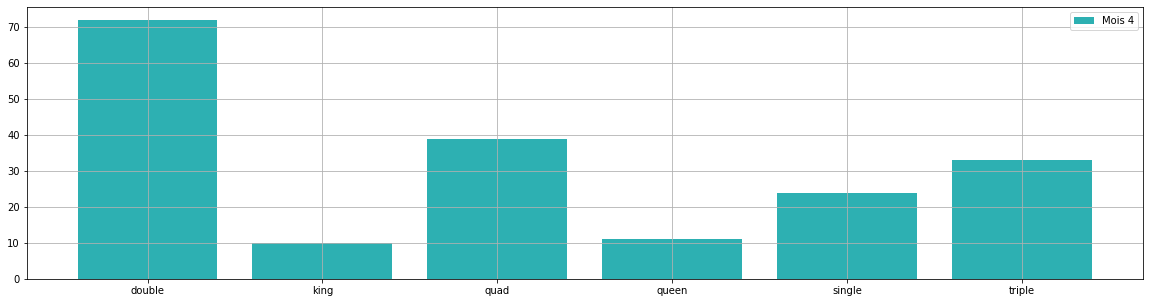

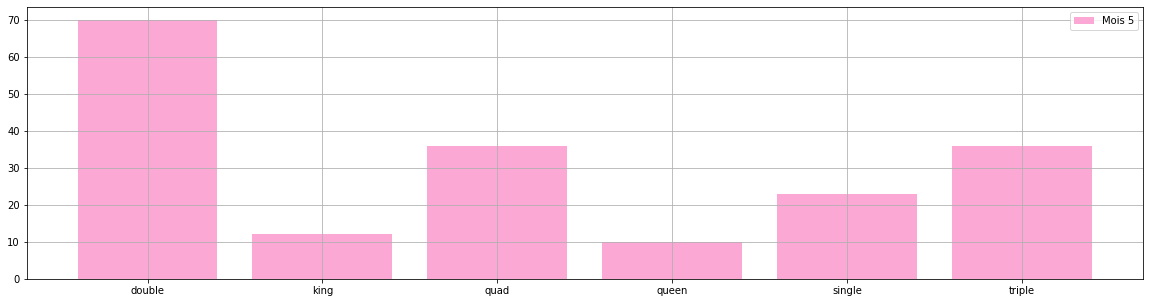

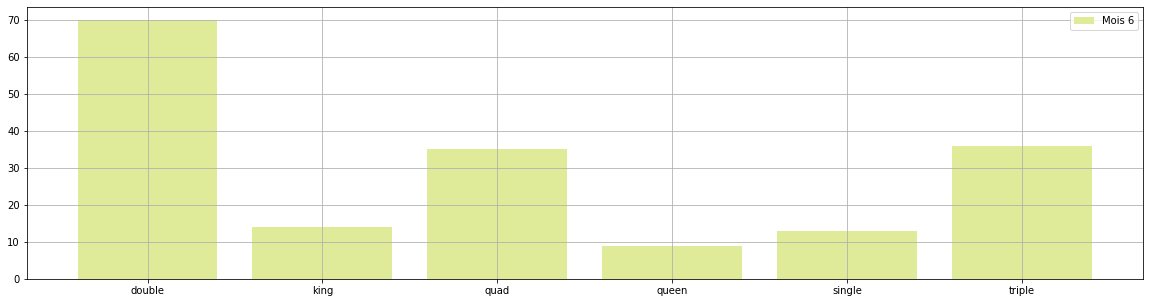

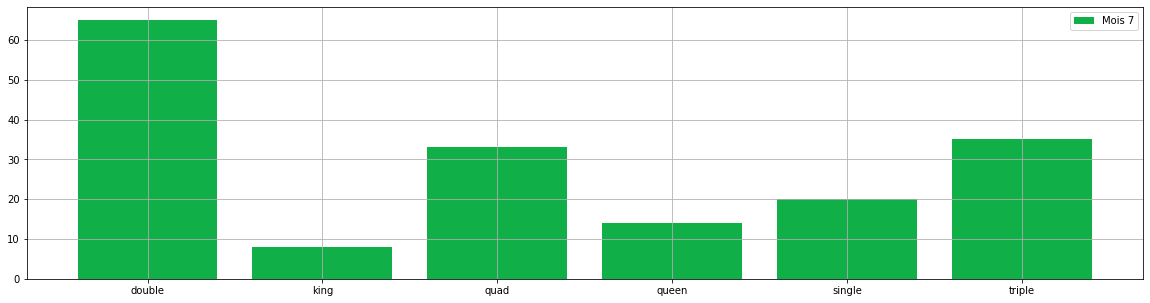

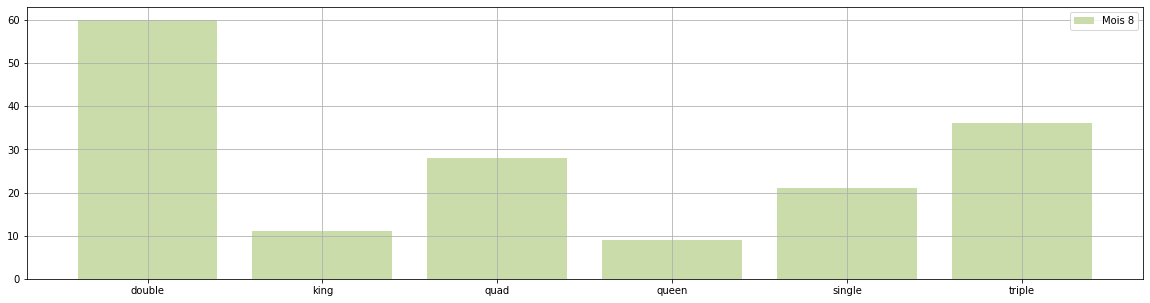

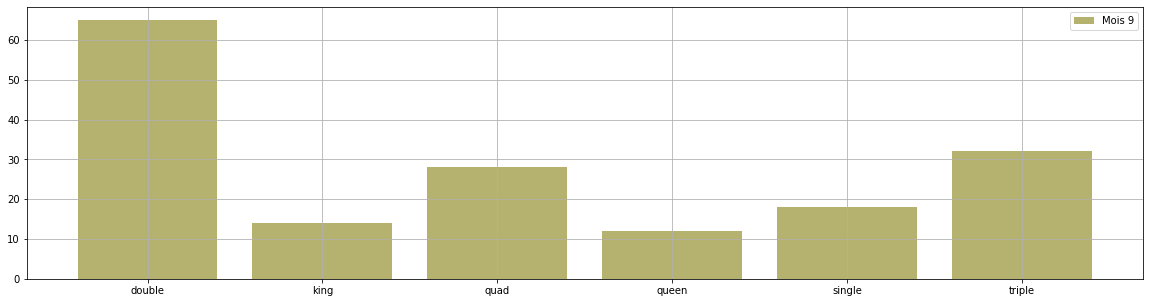

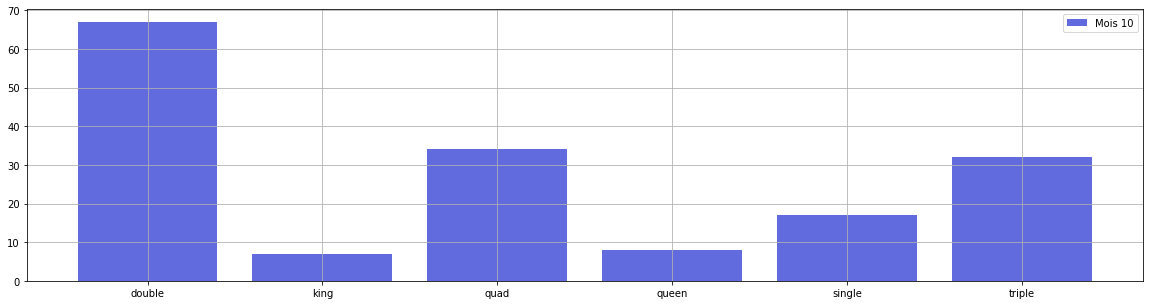

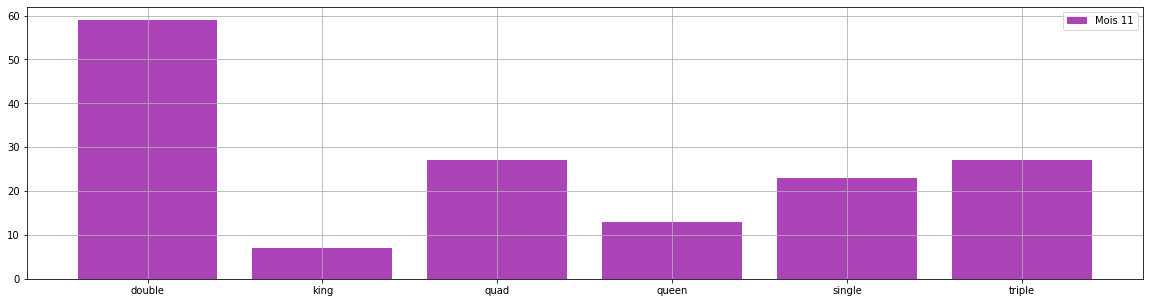

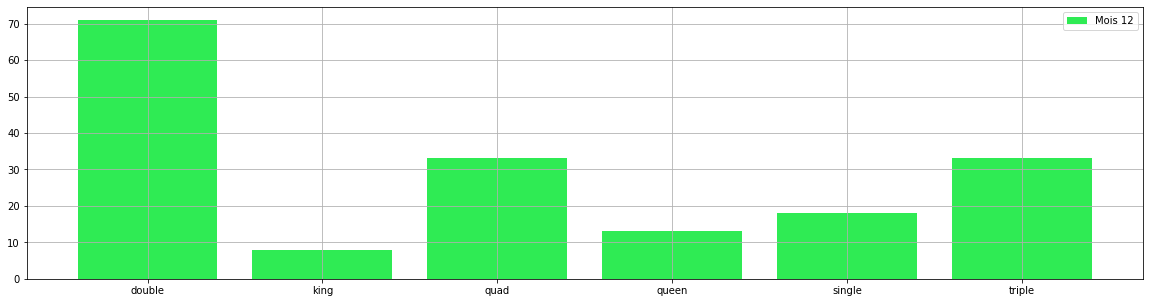

In [14]:
id_hotel = 2
init_plot()
for mois in range(1,13):
    execute_query(id_hotel, mois)
    add_data_plot(mois,'bar')
    show_plot()

#### Exécution de la requête

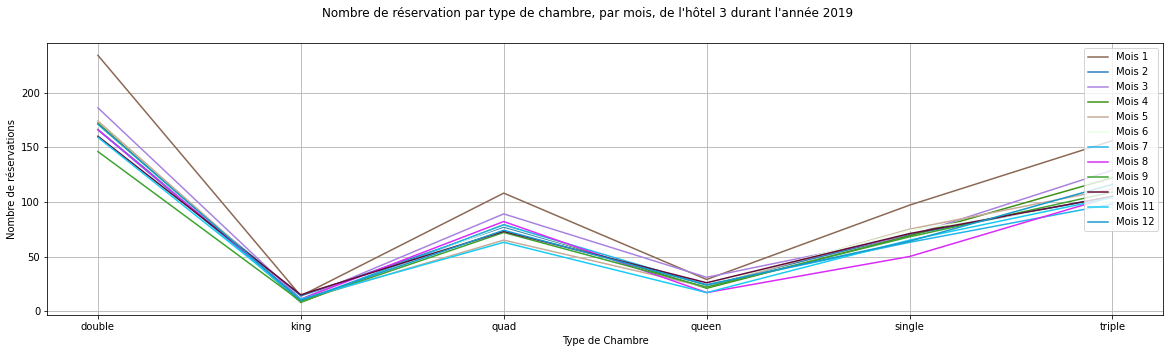

In [17]:
id_hotel = 3
init_plot()
for mois in range(1,13):
    execute_query(id_hotel, mois)
    add_data_plot(mois,'plot')
show_plot()

#### Exécution de la requête

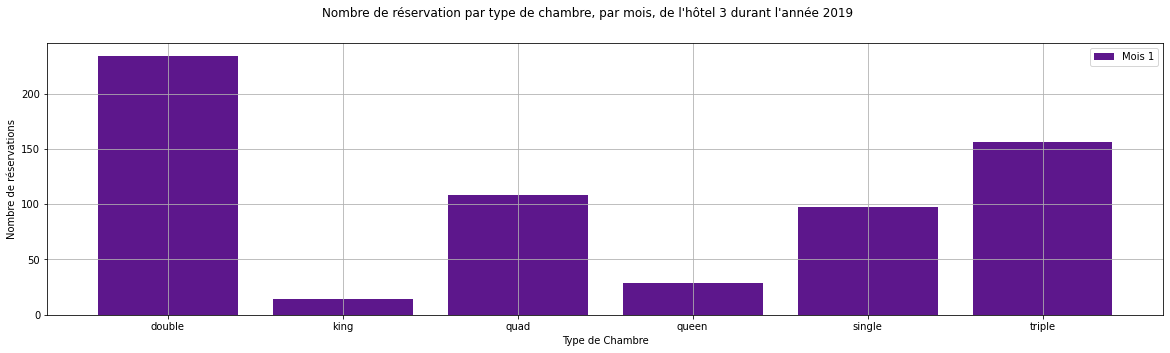

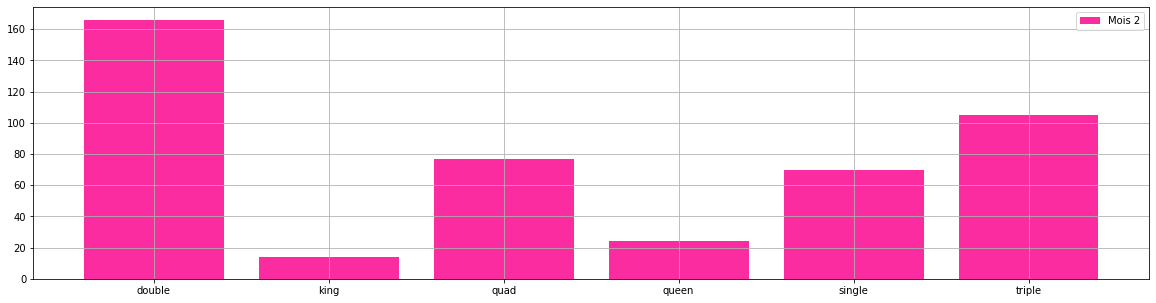

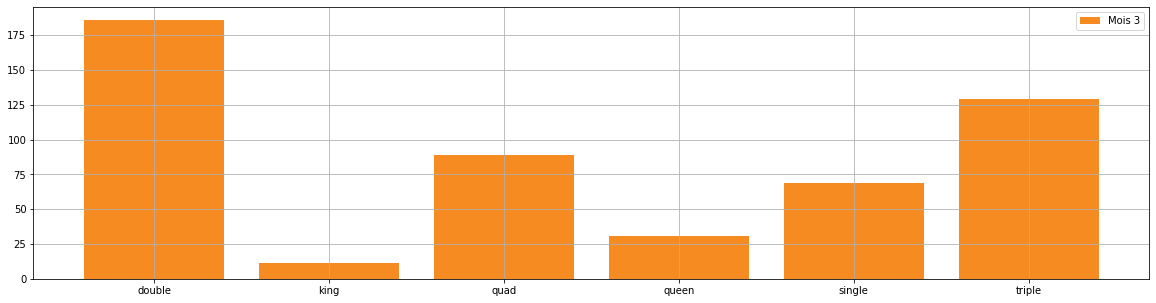

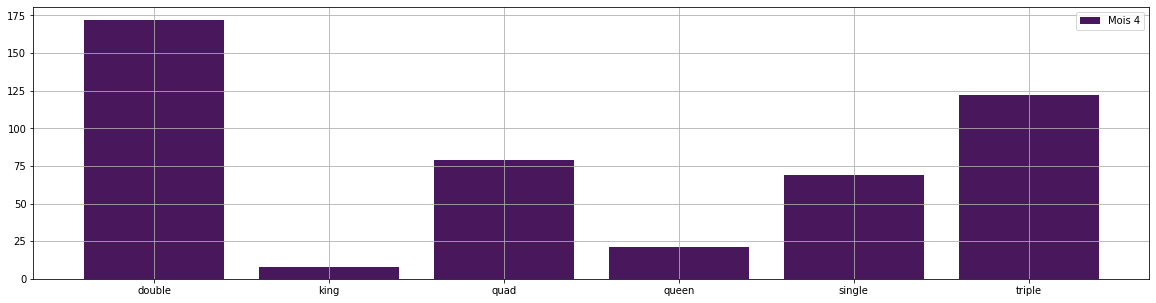

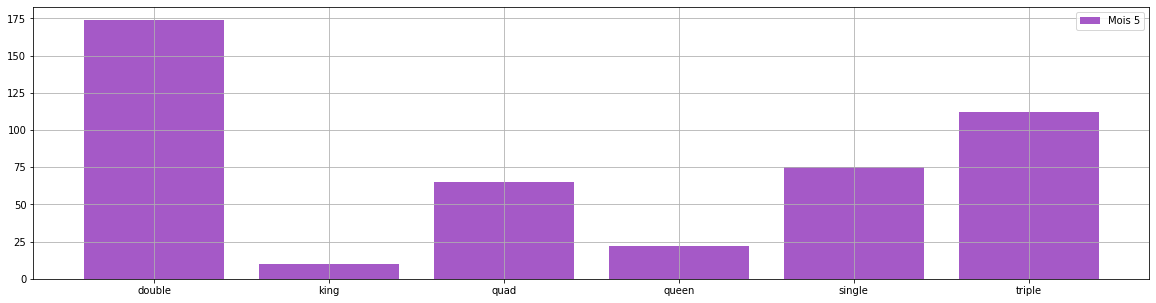

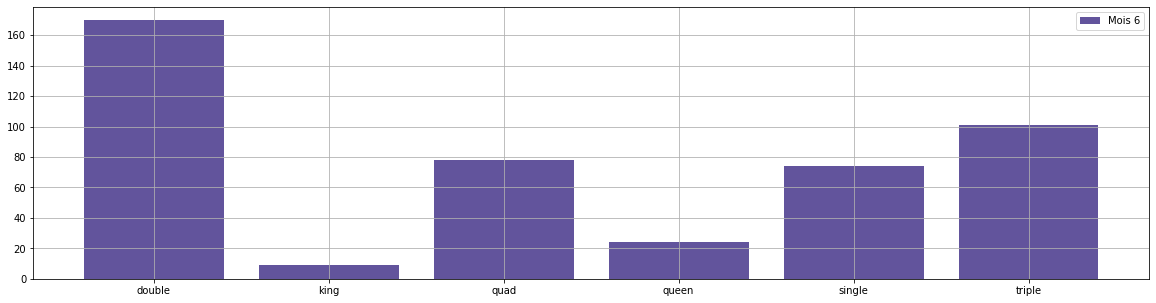

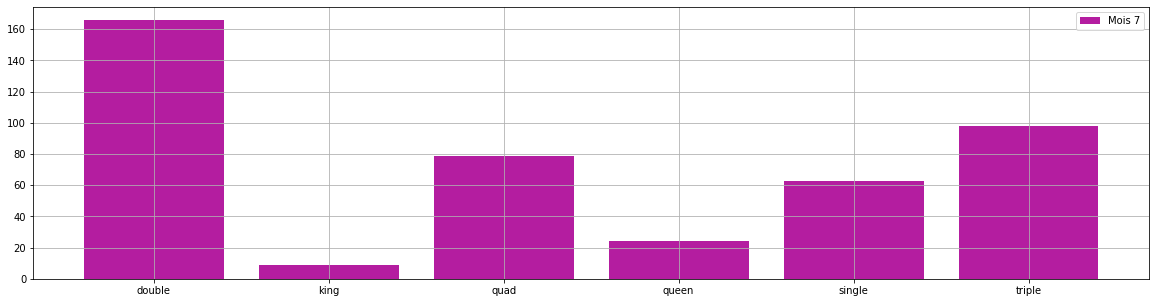

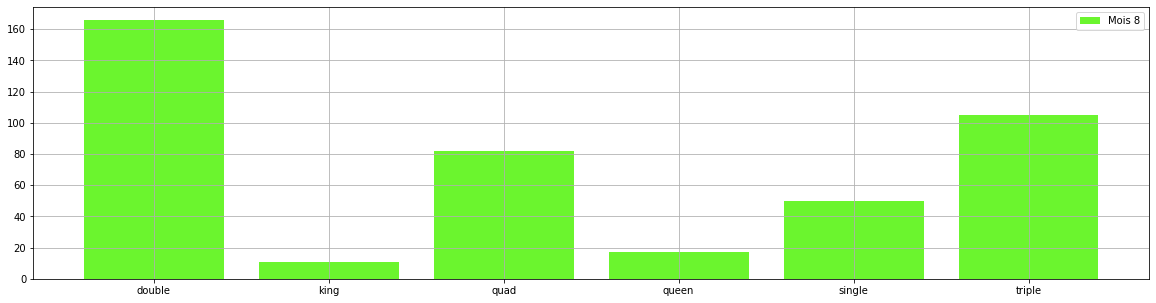

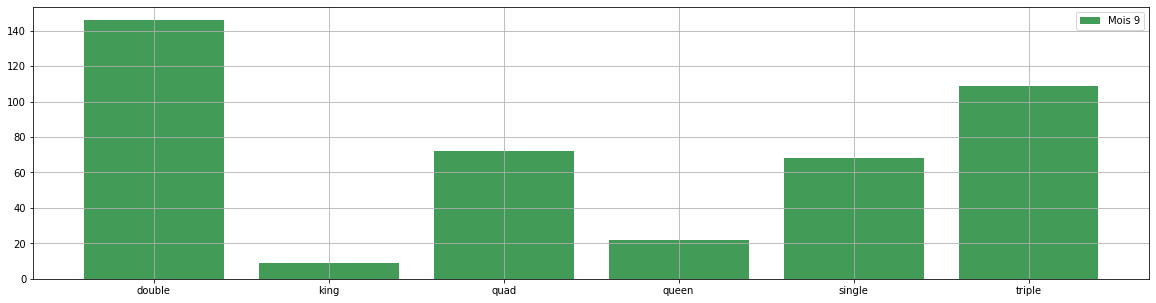

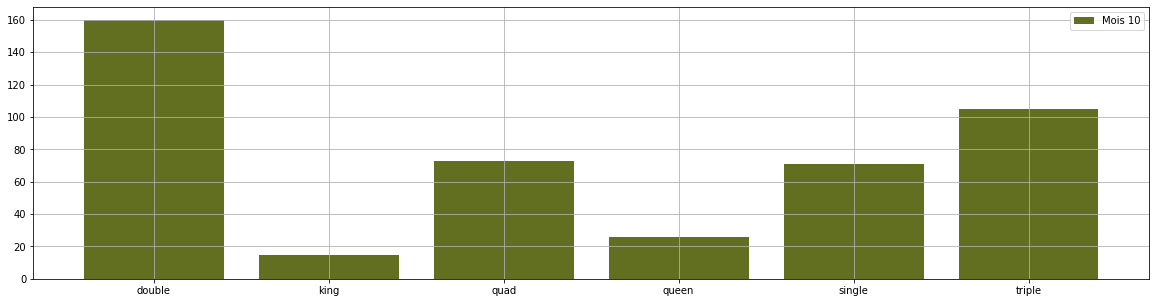

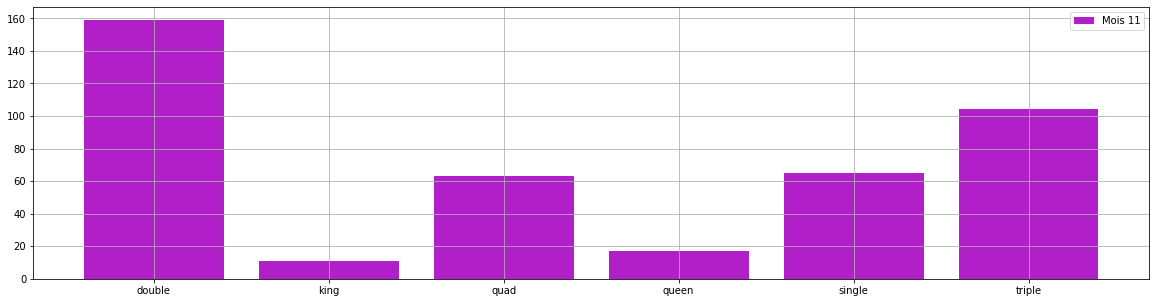

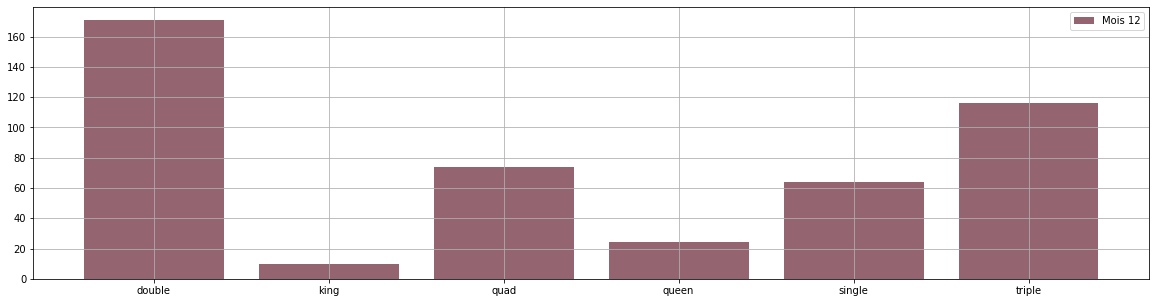

In [19]:
id_hotel = 3
init_plot()
for mois in range(1,13):
    execute_query(id_hotel, mois)
    add_data_plot(mois,'bar')
    show_plot()

#### Pour stopper la connexion (obligatoire)

In [9]:
vcursor.close()
vconnect.close()

NameError: name 'vcursor' is not defined